# Read PDF

<table align="left">
  <td style="text-align: center">
    <a href="https://github.com/mayankag22/pdf_read/notebook_template.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

| | |
|-|-|
|Author(s) | https://github.com/mayankag22|

## Overview

This code picks up pdf and parse it to create a word cloud.


## Getting Started

### Install required packages


In [34]:
%pip install --upgrade --no-deps -I google.colab

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/72.9 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/72.9 kB ? eta -:--:--
     -------------------------------------  71.7/72.9 kB 787.7 kB/s eta 0:00:01
     -------------------------------------- 72.9/72.9 kB 666.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for google.colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102287 sha256=4e1046b135a83dbdc19c0826b46e2ae5b4c4e3b38669d3068df435c7f2c7c46a
  Stored in directory: c:\users\avi\appdata\local\pip\cache\wheels\73\b6\ca\dc4e9a4b5a1658d43626182e7f6b0af210feb04d2ac8aeb14d
Successfully built google.colab
Note: you may need to restart the kernel to use updated packages.


### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [38]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


In [5]:
import re
import urllib
import warnings
from pathlib import Path


import pandas as pd
import pypdf
from tqdm import tqdm
from flask import Flask, request, jsonify

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [8]:
# Define a folder to store the files
data_folder = "data"
Path(data_folder).mkdir(parents=True, exist_ok=True)

# Define a pdf link to download and place to store the download file
pdf_url = "https://services.google.com/fh/files/misc/practitioners_guide_to_mlops_whitepaper.pdf"
pdf_file = Path(data_folder, pdf_url.split("/")[-1])

# Download the file using `urllib` library
urllib.request.urlretrieve(pdf_url, pdf_file)

(WindowsPath('data/practitioners_guide_to_mlops_whitepaper.pdf'),
 <http.client.HTTPMessage at 0x1d21b687d10>)

In [10]:
# Read the PDF file and create a list of pages
reader = pypdf.PdfReader(pdf_file)
pages = reader.pages

# Print three pages from the pdf
for i in range(3):
    text = pages[i].extract_text().strip()
    print(f"Page {i}: {text} \n\n")

Page 0: Practitioners guide to MLOps:  
A framework for continuous 
delivery and automation of  
machine learning.White paper
May 2021
Authors:  
Khalid Salama,  
Jarek Kazmierczak,  
Donna Schut 


Page 1: Table of Contents
Executive summary  3
Overview of MLOps lifecycle and core capabilities  4
Deep dive of MLOps processes  15
Putting it all together  34
Additional resources  36Building an ML-enabled system  6
The MLOps lifecycle  7
MLOps: An end-to-end workflow  8
MLOps capabilities  9
      Experimentation  11
      Data processing  11
      Model training  11
      Model evaluation  12
      Model serving  12
      Online experimentation  13
      Model monitoring  13
      ML pipelines  13
      Model registry  14
      Dataset and feature repository  14
      ML metadata and artifact tracking  15
ML development  16
Training operationalization  18
Continuous training  20
Model deployment  23
Prediction serving  25
Continuous monitoring  26
Data and model management  29
      Dat

In [16]:
# Read the PDF file and create a list of pages
reader = pypdf.PdfReader(pdf_file)
pages = reader.pages

# Entry string to concatenate all the extacted texts
concatenated_text = ""

# Loop through the pages
for page in tqdm(pages):
    # Extract the text from the page and remove any leading or trailing whitespace
    text = page.extract_text().strip()

    # Concate the extracted text to the concatenated text
    concatenated_text += text

print(f"There are {len(concatenated_text)} characters in the pdf")

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 19.36it/s]

There are 64758 characters in the pdf


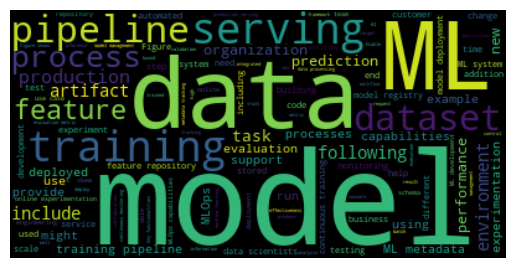

In [30]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(concatenated_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()